In [36]:
from mapbuilder import MapBuilder
from invprojection import  RBFinv, Pinv_ilamp, NNinv_torch, SSNP, PPinvWrapper
from sklearn.preprocessing import minmax_scale, MinMaxScaler
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.manifold import TSNE, MDS
from sklearn.linear_model import LogisticRegression
from umap import UMAP
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import time

In [37]:
# X, y = make_blobs(n_samples=800, centers=4, n_features=30, random_state=42)
# X = minmax_scale(X)
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = np.array(X)
y = np.array(y)
X = X.astype('float32') / 255.
y = y.astype('int')
X, _, y, _ = train_test_split(X, y, train_size=5000, test_size=2000, random_state=420)
# iris = load_iris()
# X = iris.data
# y = iris.target
# X = minmax_scale(X)

# clf = LogisticRegression()
# clf.fit(X, y)

/home/peyote/.conda/envs/tf3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [38]:
# P = UMAP(n_components=2)

# # X2D = TSNE(n_components=2).fit_transform(X)
# X2D = P.fit_transform(X)
# plt.scatter(X2D[:, 0], X2D[:, 1], c=y)
# Pinv = NNinv_torch(dims=[128, 256, 512, 1024])
# # Pinv = NNinv_torch()
# # Pinv = RBFinv()
# # Pinv = Pinv_ilamp()
# Pinv.fit(X2D, X)

PPinv = SSNP()
# PPinv = PPinvWrapper(UMAP(n_components=2, random_state=0), NNinv_torch((128, 256, 512, 1024)))
# PPinv = PPinvWrapper(UMAP(n_components=2), NNinv_torch((128, 256, 512, 1024)))
# PPinv = PPinvWrapper(UMAP(n_components=2), RBFinv())
# PPinv = PPinvWrapper(UMAP(n_components=2), Pinv_ilamp())
PPinv.fit(X=X, y=y)
X2D = PPinv.transform(X)

2024-12-02 16:48:47.880481: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-02 16:48:47.883868: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-02 16:48:47.886247: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/100


2024-12-02 16:48:49.261777: I external/local_xla/xla/service/service.cc:168] XLA service 0x70c6540a7740 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-02 16:48:49.261812: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-12-02 16:48:49.268438: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-02 16:48:49.286932: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
I0000 00:00:1733154529.352550   35478 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


149/149 [==============================] - 3s 4ms/step - loss: 2.6354 - main_output_loss: 1.1394 - decoder_output_loss: 0.3112 - main_output_accuracy: 0.5745 - decoder_output_accuracy: 0.0118 - val_loss: 1.6354 - val_main_output_loss: 0.7092 - val_decoder_output_loss: 0.2448 - val_main_output_accuracy: 0.7480 - val_decoder_output_accuracy: 0.0160
Epoch 2/100
149/149 [==============================] - 0s 3ms/step - loss: 1.2176 - main_output_loss: 0.5396 - decoder_output_loss: 0.2346 - main_output_accuracy: 0.8181 - decoder_output_accuracy: 0.0158 - val_loss: 1.0332 - val_main_output_loss: 0.5252 - val_decoder_output_loss: 0.2342 - val_main_output_accuracy: 0.8160 - val_decoder_output_accuracy: 0.0160
Epoch 3/100
149/149 [==============================] - 0s 3ms/step - loss: 0.7763 - main_output_loss: 0.3592 - decoder_output_loss: 0.2262 - main_output_accuracy: 0.8914 - decoder_output_accuracy: 0.0143 - val_loss: 0.7947 - val_main_output_loss: 0.4432 - val_decoder_output_loss: 0.2247 - 

In [39]:
builder = MapBuilder(PPinv, None, X2d=X2D, X=X, y=y, scaling=0.9)

n_classes: 10


Loss: 1.4752: 100%|██████████| 150/150 [00:05<00:00, 26.85it/s]


fast strategy
time accumulative: 0.003417491912841797
time accumulative2: 0.9195983409881592
time called: 18
time total: 0.9853689670562744
fast strategy
threshold_abs: 9.694874572753907
initial windows time: 0.3954942226409912
time_acc: 0.0025949478149414062 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
time accumulative: 0.0025949478149414062
time accumulative2: 1.428095817565918
time called: 20
time total: 1.5381031036376953
fast strategy
relace the label with the dist_map


/home/peyote/workspace/map_builder/mapbuilder/deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


time accumulative: 0.00366973876953125
time accumulative2: 0.992764949798584
time called: 19
time total: 2.504239082336426
fast strategy
threshold_abs: 0.6950419635231962
initial windows time: 0.18782567977905273
time_acc: 0.0007462501525878906 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
time accumulative: 0.0007462501525878906
time accumulative2: 0.23796892166137695
time called: 5
time total: 0.40760326385498047


<Axes: title={'center': 'label'}>

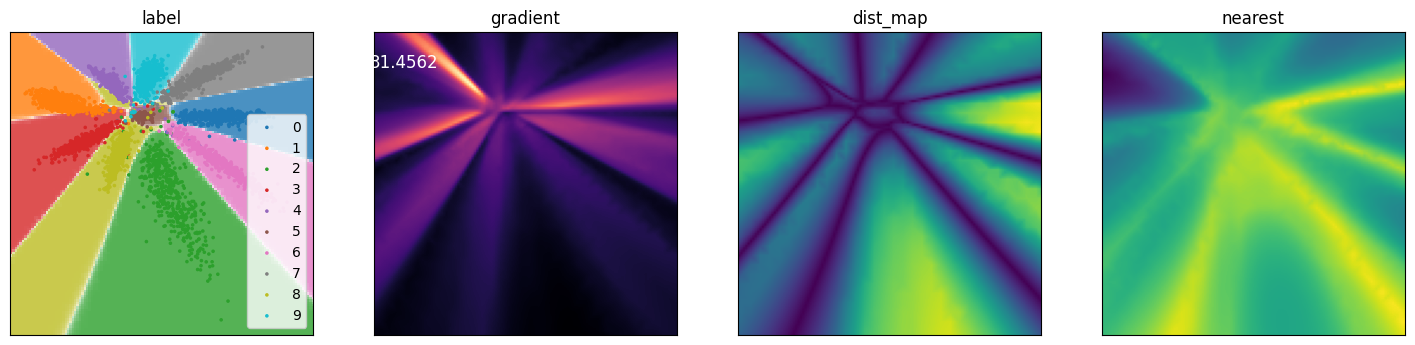

In [40]:
conten_list = ['label', 'gradient',  'dist_map', 'nearest']
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=128)
    ax[i].set_title(content)
    ax[i].set_aspect('equal')

builder.plot_training_data(ax=ax[0])
# fig.savefig('figures/dummy.png', dpi=300)

In [41]:
# fig.savefig('figures/dummy.png', dpi=300)

slow strategy
time accumulative: 0.0002815723419189453
time accumulative2: 0.38187742233276367
time called: 1
time total: 0.39511847496032715
slow strategy
time accumulative: 0.0002357959747314453
time accumulative2: 0.4450240135192871
time called: 1
time total: 0.5079824924468994
slow strategy
time accumulative: 0.0002262592315673828
time accumulative2: 0.32889652252197266
time called: 1
time total: 4.8422017097473145
slow strategy
time accumulative: 0.0002961158752441406
time accumulative2: 0.3453826904296875
time called: 1
time total: 0.8859400749206543


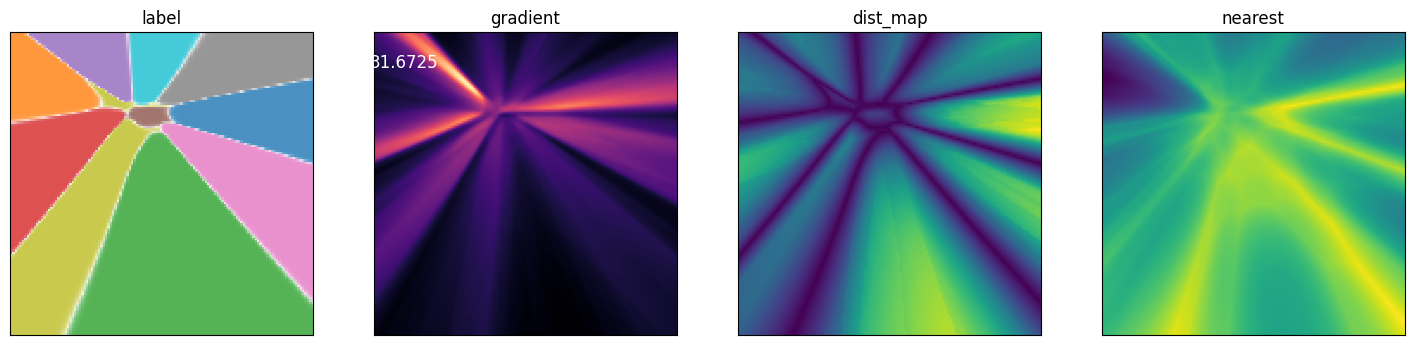

In [42]:
conten_list = ['label', 'gradient',  'dist_map', 'nearest',]
fast_strategy = False
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=128)
    ax[i].set_title(content)
    ax[i].set_aspect('equal')

# fig.savefig('figures/fast.png', dpi=300)

slow strategy
time accumulative: 0.0007948875427246094
time accumulative2: 1.5548505783081055
time called: 1
time total: 1.803286075592041
1.8042833805084229
fast strategy
threshold_abs: 14.636985397338867
initial windows time: 0.19352412223815918
time_acc: 0.0005362033843994141 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
time accumulative: 0.0005362033843994141
time accumulative2: 0.5142397880554199
time called: 5
time total: 0.7287354469299316
0.7296915054321289


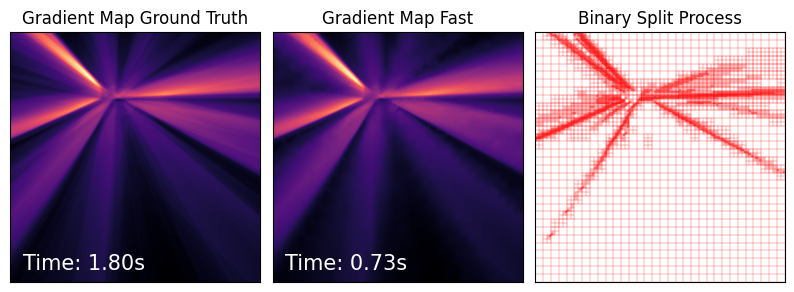

In [43]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 3, figsize=(10, 3.8))
fig.subplots_adjust(wspace=0.05, hspace=0.03)
GRID = 256
threshold = 0.15
# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
time0 = time.time()
_, sparse = builder.plot_gradient_map(ax[0],  fast=False, grid=GRID, plot_mean=False)

time1 = time.time()
print(time1-time0)
_, sparse = builder.plot_gradient_map(ax[1],  fast=True, grid=GRID, initial_resolution=32, threshold=threshold, plot_mean=False, reduced=True) ## threshold at most 0.2
time2 = time.time()
print(time2-time1)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
# ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='magma', marker='s', s=2)

ax[0].set_title('Gradient Map Ground Truth')
ax[1].set_title('Gradient Map Fast')
ax[0].text(0.05, 0.05, 'Time: {:.2f}s'.format(time1-time0), fontsize=15, color='w')
ax[1].text(0.05, 0.05, 'Time: {:.2f}s'.format(time2-time1), fontsize=15, color='w')

# ax[2].set_title('Sparse Gradient Map')
# ax[2].set_aspect('equal')
ax[2].set_title('Binary Split Process')
ax[2].set_aspect('equal')

threshold = 0
for item in sparse:
    if item[-2] > threshold and item[-1] > threshold:
        w, h = item[-1], item[-2]
        ax[2].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
        # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
        # ax.set_xlim(0, GRID)
        # ax.set_ylim(0, GRID)
    # else:
    #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
ax[2].set(xlim=(0-1, GRID), ylim=(0-1, GRID))
# ax[2].axis('off')
ax[2].set_xticks([])
ax[2].set_yticks([])

fig.savefig('results/figures/grad_map_ssnp_mnist_t015.eps', dpi=300)

# fig.savefig('results/figures/grad_map_umap_nninv_mnist.pdf', dpi=300)

slow strategy
time accumulative: 0.0007476806640625
time accumulative2: 1.3387610912322998
time called: 1
time total: 1.6045188903808594
1.605680227279663
fast strategy
threshold_abs: 50.654258728027344
initial windows time: 0.3938760757446289
time_acc: 0.0026655197143554688 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
time accumulative: 0.0026655197143554688
time accumulative2: 1.0820586681365967
time called: 24
time total: 1.112295150756836
1.1134021282196045


[(-5.0, 257.0), (-5.0, 257.0)]

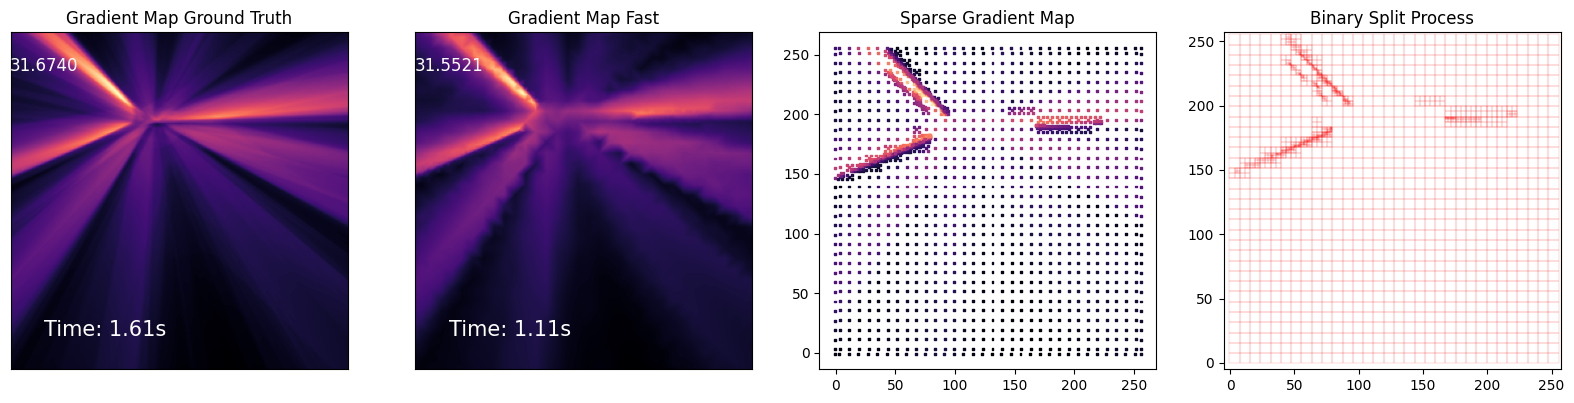

In [44]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
GRID = 256
threshold = 0.5
# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
time0 = time.time()
_, sparse = builder.plot_gradient_map(ax[0],  fast=False, grid=GRID)

time1 = time.time()
print(time1-time0)
_, sparse = builder.plot_gradient_map(ax[1],  fast=True, grid=GRID, initial_resolution=32, threshold=threshold) ## threshold at most 0.2
time2 = time.time()
print(time2-time1)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='magma', marker='s', s=2)

ax[0].set_title('Gradient Map Ground Truth')
ax[1].set_title('Gradient Map Fast')
ax[0].text(0.1, 0.1, 'Time: {:.2f}s'.format(time1-time0), fontsize=15, color='w')
ax[1].text(0.1, 0.1, 'Time: {:.2f}s'.format(time2-time1), fontsize=15, color='w')

ax[2].set_title('Sparse Gradient Map')
ax[2].set_aspect('equal')
ax[3].set_title('Binary Split Process')
ax[3].set_aspect('equal')

threshold = 0
for item in sparse:
    if item[-2] > threshold and item[-1] > threshold:
        w, h = item[-1], item[-2]
        ax[3].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
        # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
        # ax.set_xlim(0, GRID)
        # ax.set_ylim(0, GRID)
    # else:
    #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
ax[3].set(xlim=(0-5, GRID+1), ylim=(0-5, GRID+1))

# fig.savefig('figures/grad_map.pdf', dpi=300)


slow strategy
time accumulative: 0.0007841587066650391
time accumulative2: 1.3787517547607422
time called: 1
time total: 1.6274943351745605
1.628535509109497
fast strategy
threshold_abs: 19.515980529785157
initial windows time: 0.17697548866271973
time_acc: 0.0004985332489013672 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
time accumulative: 0.0004985332489013672
time accumulative2: 0.4390828609466553
time called: 5
time total: 0.5851397514343262
0.5862720012664795


[(-5.0, 257.0), (-5.0, 257.0)]

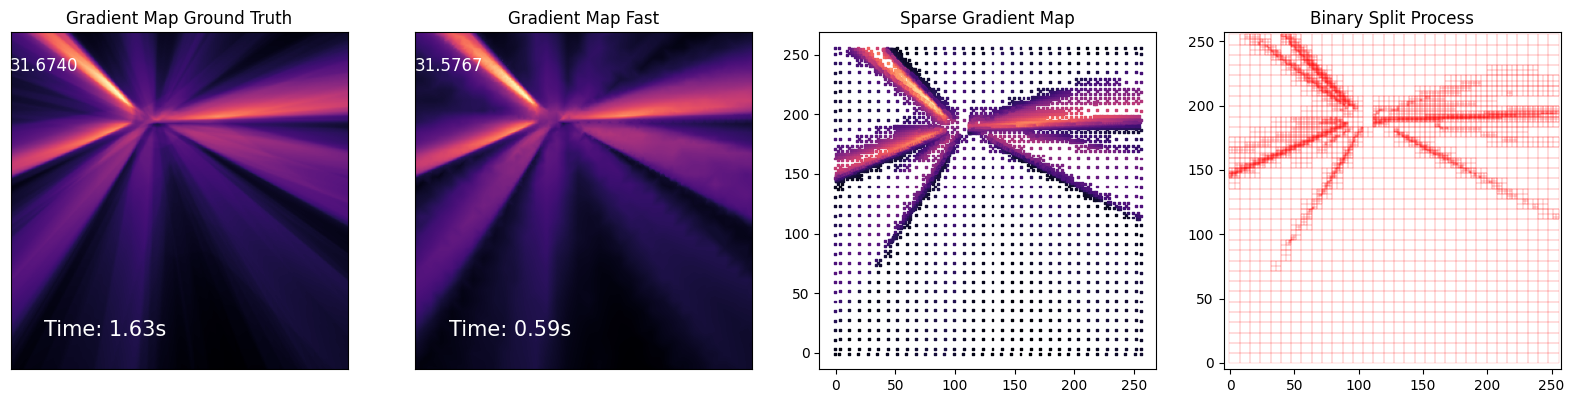

In [45]:
conten_list = ['label', 'gradient_reduced', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
GRID = 256

threshold = 0.2
# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
time0 = time.time()
_, sparse = builder.plot_gradient_map(ax[0],  fast=False, grid=GRID)

time1 = time.time()
print(time1-time0)
_, sparse = builder.plot_gradient_map(ax[1],  fast=True, grid=GRID, initial_resolution=32, threshold=threshold, reduced=True) ## threshold at most 0.2
time2 = time.time()
print(time2-time1)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='magma', marker='s', s=2)

ax[0].set_title('Gradient Map Ground Truth')
ax[1].set_title('Gradient Map Fast')
ax[0].text(0.1, 0.1, 'Time: {:.2f}s'.format(time1-time0), fontsize=15, color='w')
ax[1].text(0.1, 0.1, 'Time: {:.2f}s'.format(time2-time1), fontsize=15, color='w')

ax[2].set_title('Sparse Gradient Map')
ax[2].set_aspect('equal')
ax[3].set_title('Binary Split Process')
ax[3].set_aspect('equal')

threshold = 0
for item in sparse:
    if item[-2] > threshold and item[-1] > threshold:
        w, h = item[-1], item[-2]
        ax[3].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
        # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
        # ax.set_xlim(0, GRID)
        # ax.set_ylim(0, GRID)
    # else:
    #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
ax[3].set(xlim=(0-5, GRID+1), ylim=(0-5, GRID+1))


slow strategy
time accumulative: 0.0007550716400146484
time accumulative2: 1.4802749156951904
time called: 1
time total: 18.299344062805176
fast strategy
relace the label with the dist_map


/home/peyote/workspace/map_builder/mapbuilder/deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


time accumulative: 0.006592750549316406
time accumulative2: 1.6350867748260498
time called: 29
time total: 4.222893714904785


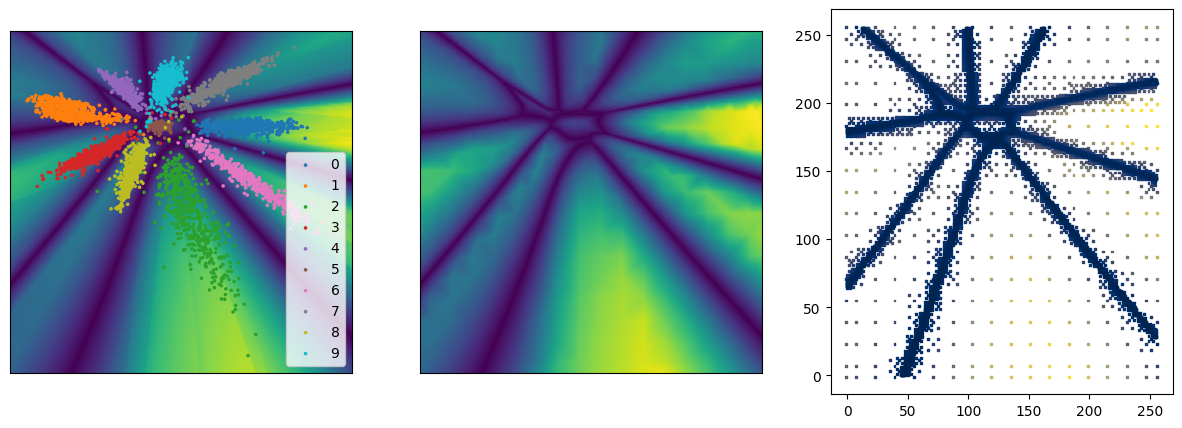

In [46]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

builder.plot_dist_map(ax[0],  fast=False, grid=256)
builder.plot_training_data(ax=ax[0])
_, sparse = builder.plot_dist_map(ax[1],  fast=fast_strategy, grid=256, initial_resolution=16)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='cividis', marker='s', s=2)

# fig.savefig('figures/spares.png', dpi=300)


slow strategy
time accumulative: 0.0007619857788085938
time accumulative2: 1.2685720920562744
time called: 1
time total: 3.268561363220215
fast strategy
threshold_abs: 1.7395068945004752
initial windows time: 0.2006821632385254
time_acc: 0 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
time accumulative: 0
time accumulative2: 0.09890127182006836
time called: 2
time total: 0.21497368812561035


[(-1.0, 256.0), (-1.0, 256.0)]

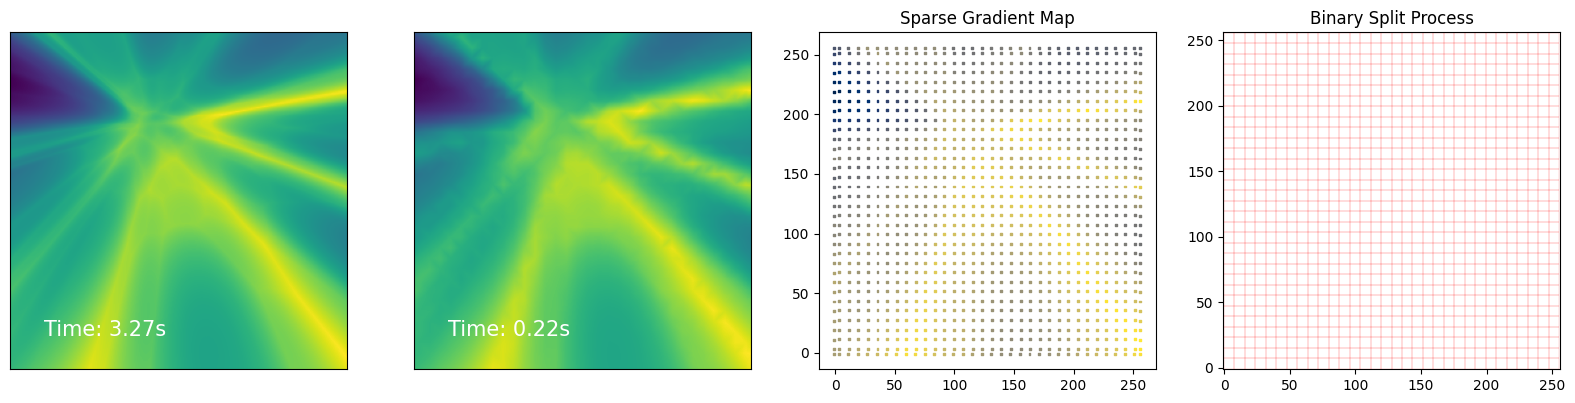

In [47]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
GRID = 256

time0 = time.time()
builder.plot_dist_map(ax[0],  fast=False, grid=GRID, content='nearest')
time1 = time.time()
# builder.plot_training_data(ax=ax[0])
_, sparse = builder.plot_dist_map(ax[1],  fast=fast_strategy, grid=GRID, initial_resolution=32, content='nearest', threshold=0.5)
time2 = time.time()
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='cividis', marker='s', s=2)

ax[0].text(0.1, 0.1, 'Time: {:.2f}s'.format(time1-time0), fontsize=15, color='w')
ax[1].text(0.1, 0.1, 'Time: {:.2f}s'.format(time2-time1), fontsize=15, color='w')

ax[2].set_title('Sparse Gradient Map')
ax[2].set_aspect('equal')
ax[3].set_title('Binary Split Process')
ax[3].set_aspect('equal')

threshold = 0
for item in sparse:
    if item[-2] > threshold and item[-1] > threshold:
        w, h = item[-1], item[-2]
        ax[3].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
        # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
        # ax.set_xlim(0, GRID)
        # ax.set_ylim(0, GRID)
    # else:
    #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
ax[3].set(xlim=(-1, GRID), ylim=(-1, GRID))

# fig.savefig('figures/near2neighor.pdf', dpi=300)


slow strategy
time accumulative: 0.0007417201995849609
time accumulative2: 1.1973772048950195
time called: 1
time total: 3.2356081008911133
fast strategy
threshold_abs: 0.5218520683501425
initial windows time: 0.1589968204498291
time_acc: 0.0012042522430419922 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
time accumulative: 0.0012042522430419922
time accumulative2: 0.3388791084289551
time called: 6
time total: 0.5482230186462402


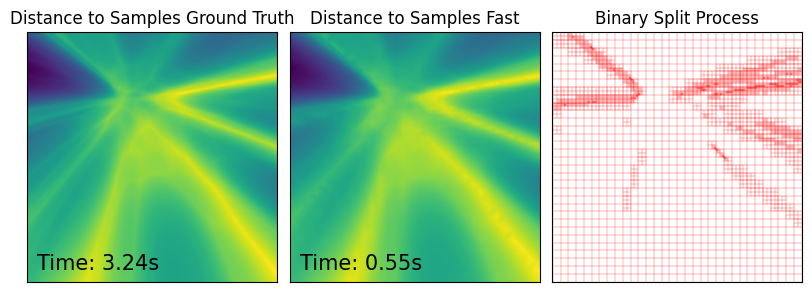

In [48]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 3, figsize=(10, 3.8))
fig.subplots_adjust(wspace=0.05, hspace=0.03)
GRID = 256

time0 = time.time()
builder.plot_dist_map(ax[0],  fast=False, grid=GRID, content='nearest')
time1 = time.time()
# builder.plot_training_data(ax=ax[0])
_, sparse = builder.plot_dist_map(ax[1],  fast=fast_strategy, grid=GRID, initial_resolution=32, content='nearest', threshold=0.15)
time2 = time.time()
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
# ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='cividis', marker='s', s=2)

ax[0].text(0.04, 0.05, 'Time: {:.2f}s'.format(time1-time0), fontsize=15, color='k')
ax[1].text(0.04, 0.05, 'Time: {:.2f}s'.format(time2-time1), fontsize=15, color='k')

ax[0].set_title('Distance to Samples Ground Truth')
ax[1].set_title('Distance to Samples Fast')

# ax[2].set_title('Sparse Gradient Map')
# ax[2].set_aspect('equal')
ax[2].set_title('Binary Split Process')
ax[2].set_aspect('equal')

threshold = 0
for item in sparse:
    if item[-2] > threshold and item[-1] > threshold:
        w, h = item[-1], item[-2]
        ax[2].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
        # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
        # ax.set_xlim(0, GRID)
        # ax.set_ylim(0, GRID)
    # else:
    #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
ax[2].set(xlim=(-1, GRID), ylim=(-1, GRID))
ax[2].set_xticks([])
ax[2].set_yticks([])

# fig.savefig('figures/near2neighor.pdf', dpi=300)

fig.savefig('results/figures/dist_map_umap_ssnp_t015.eps', dpi=300)
# fig.savefig('results/figures/dist_map_umap_nninv_mnist.pdf', dpi=300)